### aim: 

### date: 

In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [65]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [66]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [67]:
import coldic as cd
reload(cd)
ex = False
if ex:
    sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
    ukesm_ts = xr.open_dataset(f'{sdir}UKESM_40-60S_mean_wspd_ts_1980-2019.nc')
    ukesm_nz_ts = xr.open_dataset(f'{sdir}UKESM_NOZONE_40-60S_mean_wspd_ts_1980-2019.nc')


    fact = 1
    fig = plt.figure(figsize=(12*fact, 9*fact))
    gs = fig.add_gridspec(3, 4)
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax3 = fig.add_subplot(gs[1, 0:2])
    ax4 = fig.add_subplot(gs[1, 2:4])


    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    ax7 = fig.add_subplot(gs[2, 2])
    ax8 = fig.add_subplot(gs[2, 3])

    tn = ['UKESM','UKESM_NOZONE']
    tnt = ['historical run', 'no ozone depletion']
    tdar = [ukesm_ts,ukesm_nz_ts]
    #tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex]

    for i in range(0,2):

        xmi = 9; mar = 0.9
        td = tdar[i]
        a = td.groupby('time_counter.year').mean()
        ax1.plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
                    label =  tnt[i], linestyle = '-', linewidth = 1.5)
        ax1.set_ylim([xmi,xmi+mar])

        xmi = 8.1
        a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        ax2.plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
                    label = tnt[i], linestyle = '-', linewidth = 1.5)
        ax2.set_ylim([xmi,xmi+mar])
        ax2.set_xlim([1980,2019])
        ax1.set_xlim([1980,2019])


    # prods = ['UKESM', 'UKESM_NOZONE']
    # ls = [':','-']

    # al = 0.1

    # for p in prods:
    #     for yr in [1940,2010]:
    #         ls = '-'    
    #         w = xr.open_dataset(f'{tdir}/KDE-{p}-FY-{yr}-{yr+9}.nc')
    #         ax3.plot(w.kde_x, w.kde, color = cd.prod[p]['col'], linewidth = 2, linestyle = ls, label = cd.prod[p]['fnam'])
    #         # ax3.fill_between(w.kde_x, np.zeros_like(w.kde_x.values), w.kde.values, \
    #         #                     color = cd.prod[p]['col'], alpha = al, zorder = 20)    
    #         ax3.set_xlim([0,20])
    #         w = xr.open_dataset(f'{tdir}/KDE-{p}-DJF-{yr}-{yr+9}.nc')
    #         ax4.plot(w.kde_x, w.kde, color = cd.prod[p]['col'], linewidth = 2, linestyle = ls)
    #         # ax4.fill_between(w.kde_x, np.zeros_like(w.kde_x.values), w.kde.values, \
    #         #                     color = cd.prod[p]['col'], alpha = al, zorder = 20)         
    #         ax4.set_xlim([5,20])

    # ax1.legend(loc = 'best')
    # ax1.set_title('mean wind speed, full year')
    # ax2.set_title('mean wind speed, DJF')
    # ax3.set_title('wind distribution, full year')
    # ax4.set_title('wind distribution, DJF')

    plt.tight_layout()
    #fig.savefig('./plts/Fig-attribution.jpg', dpi = 300, bbox_inches='tight')


## get ts 

In [68]:
def make_yearlist(yrst, yrend, prod, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}/{prod}_NOZONE_wind_daily_1x1_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

ex = False
if ex:
    ukesmst = 1980; en = 2019
    ukesm = xr.open_mfdataset(make_yearlist(ukesmst, en, 'UKESM'))
    print('opened')
    ukesm_ts = ukesm.wspd10m.sel(time_counter=slice(f'{ukesmst}-01-01', f'{en+1}-01-01'))
    ukesm_ts2 = ukesm_ts.isel(lat = slice(30,50)).weighted(tmask.isel(lat = slice(30,50))).mean(dim = ['lat', 'lon'])
    ukesm_ts2.attrs = {"made in": 'plottingCode/extract_ts_2019.py'}
    ukesm_ts2.to_netcdf(f'{sdir}/UKESM_NOZONE_40-60S_mean_wspd_ts_1980-2019.nc')

In [69]:

plt.rcParams['hatch.color'] = 'k'
plt.rcParams['hatch.linewidth'] = 0.3

def plot_southern(fig, ax1, lons, lats, tdat, sigdat, tvmin, 
                  tvmax, tticks, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, -28], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    # lons = nav_lon[0:50,:]; lats = nav_lat[0:50,:]; 
    mesh = ax1.pcolormesh(lons, lats, tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, 
                     transform=ccrs.PlateCarree())
    
    is_sig_mk = np.copy(sigdat)
    is_sig_mk[is_sig_mk>0.05] = 2
    is_sig_mk[is_sig_mk<=0.05] = 1
    is_sig_mk[is_sig_mk == 2] = 0

    
    ax1.contourf(
    lons, lats, is_sig_mk,
    transform=ccrs.PlateCarree(),
    colors='grey',
    levels=[.5, 1.5],
    
    hatches=['////'], lw=0.1, alpha = 0.05
)
    
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))

    ax1.set_title(tit, fontsize = fs)
    cb = 0

    if cbr:
        
        cbar_ax = fig.add_axes([0.2, 0.06, .6, .03]) #left, bottom, width, height
        fig.colorbar(mesh, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

    return cb


2
3
4
5
6
7


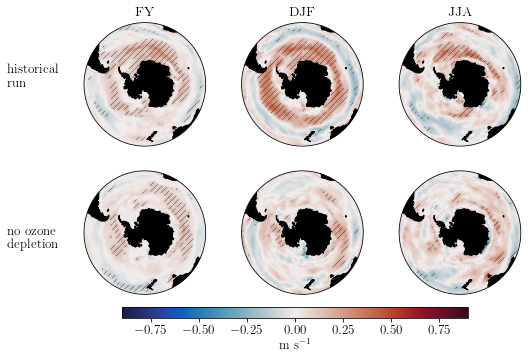

In [99]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
n = ['UKESM','UKESM_NOZONE']
seas = ['FY','DJF','JJA']#,'JJA','SON',]

fact = 0.5
fig = plt.figure(figsize=[16*fact, 10*fact])
tcm = cm.balance

botbound = -0.9
topbound = 0.9
tint = 0.2
tcm = cm.balance
tcbr = True
ind = 1
for tn in n:
    for tseas in seas:
        
        ax1 = fig.add_subplot(2, 3, ind, projection=ccrs.Orthographic(0, -90))

        w = xr.open_dataset(f'{sdir}/TRENDS-{tn}-{tseas}-1980-2019.nc')
        test = w.lin_slope*10
        sig = w.lin_p
        lons = w.lon
        lats = w.lat
    
        if ind < 6:
            tcbr = False
        else:
            tcbr = True
        tit = ''
        if ind < 4 :
            tit = f'{tseas}'
        bc = plot_southern(fig, ax1, lons, lats, test, sig, botbound, 
                      topbound, np.arange(botbound,topbound,tint), fs = 14, 
                      tit =tit, cbarlab = 'm/s', tcmap = tcm, lm = True, cbr = tcbr)
        ind = ind+1
        print(ind)
        
n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']
n = ['historical \n run', 'no ozone \ndepletion']
for i in range(0,2):
    fig.text(0,0.7 - 0.45*i,f'{n[i]}')

# plt.tight_layout()
# fig.savefig('./plts/Fig-spattrend.jpg', dpi = 300, bbox_inches='tight')
# tx = 0.1

2
3
4
5
6
7


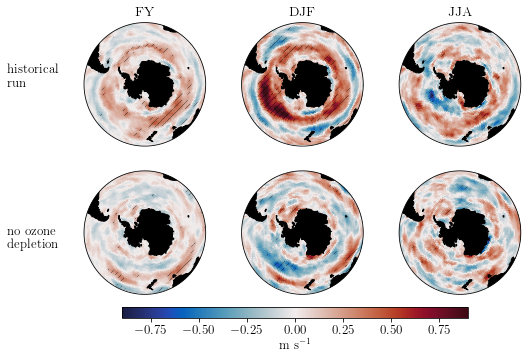

In [98]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
n = ['UKESM','UKESM_NOZONE']
seas = ['FY','DJF','JJA']#,'JJA','SON',]

fact = 0.5
fig = plt.figure(figsize=[16*fact, 10*fact])
tcm = cm.balance

botbound = -0.9
topbound = 0.9
tint = 0.2
tcm = cm.balance
tcbr = True
ind = 1
for tn in n:
    for tseas in seas:
        
        ax1 = fig.add_subplot(2, 3, ind, projection=ccrs.Orthographic(0, -90))

        w = xr.open_dataset(f'{sdir}/TRENDS-{tn}-{tseas}-1980-1999.nc')
        test = w.lin_slope*10
        sig = w.lin_p
        lons = w.lon
        lats = w.lat
    
        if ind < 6:
            tcbr = False
        else:
            tcbr = True
        tit = ''
        if ind < 4 :
            tit = f'{tseas}'
        bc = plot_southern(fig, ax1, lons, lats, test, sig, botbound, 
                      topbound, np.arange(botbound,topbound,tint), fs = 14, 
                      tit =tit, cbarlab = 'm/s', tcmap = tcm, lm = True, cbr = tcbr)
        ind = ind+1
        print(ind)
        
n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']
n = ['historical \n run', 'no ozone \ndepletion']
for i in range(0,2):
    fig.text(0,0.7 - 0.45*i,f'{n[i]}')

# plt.tight_layout()
# fig.savefig('./plts/Fig-spattrend.jpg', dpi = 300, bbox_inches='tight')
# tx = 0.1

UKESM fy, 0.0034510849144172907, 0.009951541888338866

UKESM fy first half, 0.008567511937949508, 0.013697687249193593


UKESM djf, 0.005878568857501993, 0.0003795840875219025

UKESM djf first half, 0.01269606148498111, 0.009474856619341691
UKESM_NOZONE fy, 0.003375505480042126, 0.004517890337644842

UKESM_NOZONE fy first half, 0.0024686624449177406, 0.5028503279280674
UKESM_NOZONE SIGNIFICANCE WARNING

UKESM_NOZONE SIGNIFICANCE WARNING

UKESM_NOZONE djf, 0.0028343036293579154, 0.18452664236162408
UKESM_NOZONE SIGNIFICANCE WARNING

UKESM_NOZONE djf first half, -0.0043257465642292485, 0.49337255119042756


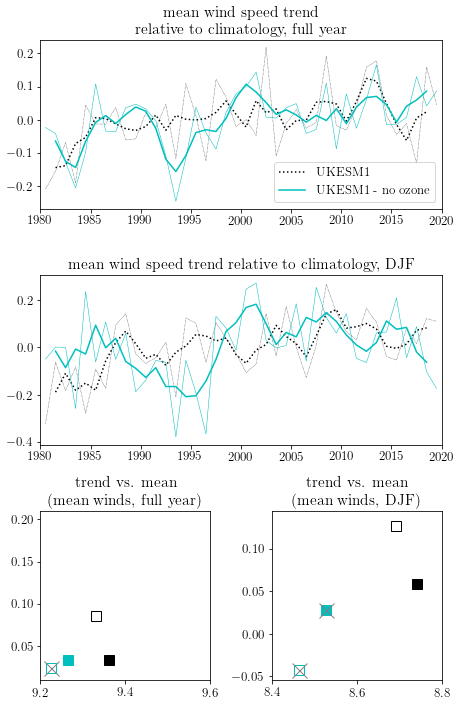

In [71]:
import coldic as cd
reload(cd)
import sharedfunc as sf
reload(sf)


fact = 1
fig = plt.figure(figsize=(6.6*fact, 10*fact))
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[2, 0:1])
ax4 = fig.add_subplot(gs[2, 1:2])

mkz = 's'; ms = 10
alph = 1
# fact = 0.6
# fig = plt.figure(figsize=[16*fact, 11*fact])

# ax1 = fig.add_subplot(2, 1,1)
# ax2 = fig.add_subplot(2, 1,2)


sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
tdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
ukesm_ts = xr.open_dataset(f'{sdir}UKESM_40-60S_mean_wspd_ts_1980-2019.nc')
ukesm_nz_ts = xr.open_dataset(f'{sdir}UKESM_NOZONE_40-60S_mean_wspd_ts_1980-2019.nc')


tn = ['UKESM','UKESM_NOZONE']
tnt = ['historical run', 'no ozone depletion']
tdar = [ukesm_ts,ukesm_nz_ts]
#tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex]

for i in range(0,2):

    td = tdar[i]

    a = td.groupby('time_counter.year').mean()
    ts = a.wspd10m - a.wspd10m.mean()
    tsv = ts.values
    ax1.plot(a.year+0.5,tsv, color = cd.prod[tn[i]]['col'], \
             linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 0.5)
    
    ax1.plot(a.year[1:-1]+0.5,sf.moving_average(tsv), color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 1.5)
    
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    ts = a.wspd10m - a.wspd10m.mean()
    tsv = ts.values
    ax2.plot(a.year+0.5,tsv, color = cd.prod[tn[i]]['col'], \
             linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 0.5)
    
    ax2.plot(a.year[1:-1]+0.5,sf.moving_average(tsv), color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'], linewidth = 1.5)
    
ax1.legend(loc = 'best')
ax1.set_title('mean wind speed trend \n relative to climatology, full year')
ax2.set_title('mean wind speed trend  relative to climatology, DJF')

ax2.set_xlim([1980,2020])
ax1.set_xlim([1980,2020])


for i in range(0,2):

    td = tdar[i]

    a = td.groupby('time_counter.year').mean()
    ts = a.wspd10m 
    tsv = ts.values
    wym = np.mean(tsv)
    mk_slope, mk_p, lin_slope, lin_p = sf.give_trends(tsv)
    print(f'{tn[i]} fy, {lin_slope}, {lin_p}')
    SW = False
    if lin_p > 0.05:
        print(f'{tn[i]} SIGNIFICANCE WARNING')
        SW = True
    print()
    ax3.plot(wym, lin_slope*10, color =cd.prod[tn[i]]['col'], \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'], alpha = alph)   
    if SW:
        ax3.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)    
    
    a = td.groupby('time_counter.year').mean()
    ts = a.wspd10m 
    tsv = ts.values[0:20]
    wym = np.mean(tsv)
    mk_slope, mk_p, lin_slope, lin_p = sf.give_trends(tsv)
    print(f'{tn[i]} fy first half, {lin_slope}, {lin_p}')
    SW = False
    if lin_p > 0.05:
        print(f'{tn[i]} SIGNIFICANCE WARNING')
        SW = True
    print()
    ax3.plot(wym, lin_slope*10, color ='w', \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'], alpha = alph)  
    if SW:
        ax3.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)        
    
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    ts = a.wspd10m 
    tsv = ts.values
    wym = np.mean(tsv)
    mk_slope, mk_p, lin_slope, lin_p = sf.give_trends(tsv)
    SW = False
    if lin_p > 0.05:
        print(f'{tn[i]} SIGNIFICANCE WARNING')
        SW = True
    print()
    print(f'{tn[i]} djf, {lin_slope}, {lin_p}')
    ax4.plot(wym, lin_slope*10, color =cd.prod[tn[i]]['col'], \
         marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'], alpha = alph)   
    if SW:
        ax4.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)    

    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    ts = a.wspd10m[0:20] 
    tsv = ts.values
    wym = np.mean(tsv)
    mk_slope, mk_p, lin_slope, lin_p = sf.give_trends(tsv)
    SW = False
    if lin_p > 0.05:
        print(f'{tn[i]} SIGNIFICANCE WARNING')
        SW = True
    print()
    print(f'{tn[i]} djf first half, {lin_slope}, {lin_p}')
    ax4.plot(wym, lin_slope*10, color ='w', \
         marker = mkz, markersize = ms, markeredgecolor = cd.prod[tn[i]]['col'], alpha = alph)   
    if SW:
        ax4.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)    
    
    ax3.set_title('trend vs. mean \n (mean winds, full year)')
    ax4.set_title('trend vs. mean \n (mean winds, DJF)')

    ox = 0.4
    ax3.set_xlim([9.2,9.2+ox])
    ax4.set_xlim([8.4,8.4+ox])
    oy = 0.2
    ax3.set_ylim([0.01,0.01+oy])
    ax4.set_ylim([-0.055,-0.055+oy])
plt.tight_layout()

In [72]:
# tn = ['UKESM','UKESM_NOZONE']
# tnt = ['historical run', 'no ozone depletion']
# tdar = [ukesm_ts,ukesm_nz_ts]
# #tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex]

# for i in range(0,2):
    
#     xmi = 9; mar = 0.9
#     td = tdar[i]
#     a = td.groupby('time_counter.year').mean()
#     ax1.plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
#                 label =  tnt[i], linestyle = '-', linewidth = 1.5)
#     ax1.set_ylim([xmi,xmi+mar])
    
#     xmi = 8.1
#     a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
#     ax2.plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
#                 label = tnt[i], linestyle = '-', linewidth = 1.5)
#     ax2.set_ylim([xmi,xmi+mar])
#     ax2.set_xlim([1980,2019])
#     ax1.set_xlim([1980,2019])

In [73]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


In [74]:
tn = ['UKESM','UKESM_NOZONE']
tnt = ['historical run', 'no ozone depletion']
dss = [ukesm_ts,ukesm_nz_ts]

data = np.zeros([5,2])
sig = np.zeros([5,2])
for i in range(0,2):
    print(dss[i])
    ds = dss[i]
    
    tdat = tdar[i]
    td = tdat
    td = td.wspd10m.groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[0,i] = lin_slope* 10
    sig[0,i] = lin_p
    

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[1,i] = lin_slope* 10
    sig[1,i] = lin_p
    

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[2,i] = lin_slope* 10
    sig[2,i] = lin_p

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[3,i] = lin_slope* 10
    sig[3,i] = lin_p
    
    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[4,i] = lin_slope * 10
    sig[4,i] = lin_p
    
        
    i = i+1
    

df = pd.DataFrame(data, columns=tn,\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df2 = pd.DataFrame(sig, columns=tn,\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df.attrs = {"made in": 'plottingCode/Fig-attribution.ipynb'}
df.to_csv(f'./plts/ukesm_wspd_trend.csv')
df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df2.to_csv(f'./plts/ukesm_wspd_trendsig.csv')

print(df)


<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
              UKESM  UKESM_NOZONE
full year  0.034511      0.033755
DJF        0.058786      0.028343
MAM        0.007218     -0.012213
JJA        0.017244      0.049587
SON        0.054796      0.069303


## timeseries trends full ts

In [86]:
tn = ['UKESM','UKESM_NOZONE']
tnt = ['historical run', 'no ozone depletion']
dss = [ukesm_ts,ukesm_nz_ts]
data = np.zeros([5,2])
sig = np.zeros([5,2])

ex = True
if ex:

    for i in range(0,2):
        print(dss[i])
        ds = dss[i]

        tdat = tdar[i]
        td = tdat
        td = td.wspd10m.groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=tn,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=tn,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-attribution.ipynb'}
    df.to_csv(f'./plts/ukesm_wspd_trend-1980-2019.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./plts/ukesm_wspd_trendsig-1980-2019.csv')

    print(df)


<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
              UKESM  UKESM_NOZONE
full year  0.034511      0.033755
DJF        0.058786      0.028343
MAM        0.007218     -0.012213
JJA        0.017244      0.049587
SON        0.054796      0.069303


## timeseries trends full 1980-2019

In [84]:
tn = ['UKESM','UKESM_NOZONE']
tnt = ['historical run', 'no ozone depletion']
dss = [ukesm_ts,ukesm_nz_ts]
data = np.zeros([5,2])
sig = np.zeros([5,2])

ex = True
if ex:

    for i in range(0,2):
        print(dss[i])
        ds = dss[i]

        tdat = tdar[i]
        td = tdat
        print(np.size(td.wspd10m.groupby('time_counter.year').mean().values))
        td = td.wspd10m.groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[0,i] = lin_slope* 10
        sig[0,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[1,i] = lin_slope* 10
        sig[1,i] = lin_p


        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[2,i] = lin_slope* 10
        sig[2,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[3,i] = lin_slope* 10
        sig[3,i] = lin_p

        td = tdat
        td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
        groupby('time_counter.year').mean().values[0:20]
        mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
        data[4,i] = lin_slope * 10
        sig[4,i] = lin_p


        i = i+1


    df = pd.DataFrame(data, columns=tn,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df2 = pd.DataFrame(sig, columns=tn,\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])

    df.attrs = {"made in": 'plottingCode/Fig-attribution.ipynb'}
    df.to_csv(f'./plts/ukesm_wspd_trend-1980-1999.csv')
    df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df2.to_csv(f'./plts/ukesm_wspd_trendsig-1980-1999.csv')

    print(df)


<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
40
<xarray.Dataset>
Dimensions:       (time_counter: 14400)
Coordinates:
  * time_counter  (time_counter) object 1980-01-01 00:00:00 ... 2019-12-30 00...
Data variables:
    wspd10m       (time_counter) float64 ...
40
              UKESM  UKESM_NOZONE
full year  0.085675      0.024687
DJF        0.126961     -0.043257
MAM        0.069850      0.022191
JJA        0.067583      0.029209
SON        0.078307      0.090604


UKESM
UKESM_NOZONE
NCEP-NCAR
MERRA
JRA
ERA5
NCEP-NCAR
MERRA
JRA
ERA5


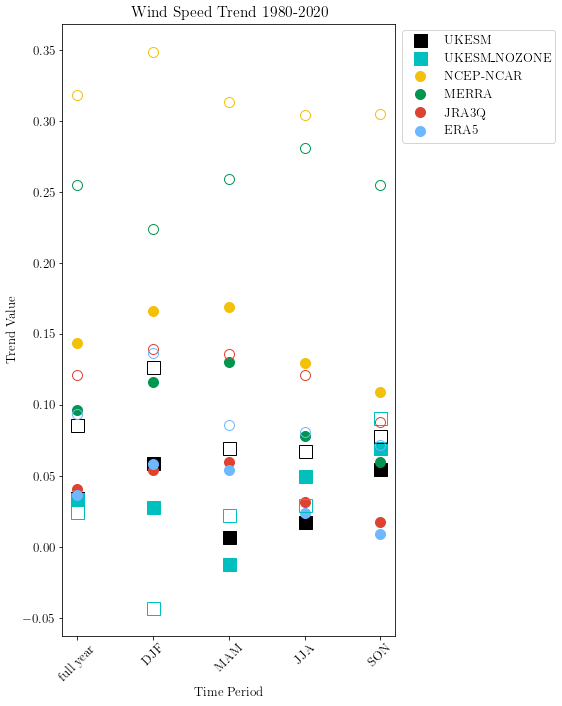

In [95]:
import coldic as cd
reload(cd)

# Plotting the data
plt.figure(figsize=(8, 10))

df = pd.read_csv('./plts/ukesm_wspd_trend-1980-2019.csv', index_col=0)
for column in df.columns:
    
    if column == 'NCEP-DOE':
        pass
    else:
    
        if column == 'JRA3Q':
            tcol = 'JRA'
        else:
            tcol = column
        print(tcol)

        if column == 'UKESM_NOZONE':
            plt.plot(df.index, df[column], marker='s', markersize = 13, linewidth = 0, label=column, color = cd.prod[tcol]['col'])
        else:
            plt.plot(df.index, df[column], marker='s', markersize = 13, linewidth = 0, label=column, color = cd.prod[tcol]['col'])

df = pd.read_csv('./plts/mn_wspd_trend-1980-2019.csv', index_col=0)
for column in df.columns:
   
    if (column == 'NCEP-DOE') or (column == 'UKESM'):
        pass
    else:
    
        if column == 'JRA3Q':
            tcol = 'JRA'
        else:
            tcol = column
        print(tcol)
        plt.plot(df.index, df[column], marker='o', markersize = 10, linewidth = 0, label=column, color = cd.prod[tcol]['col'])

#################
        
df = pd.read_csv('./plts/ukesm_wspd_trend-1980-1999.csv', index_col=0)
for column in df.columns:

        if column == 'UKESM_NOZONE':
            tcol = 'UKESM_NOZONE'
            plt.plot(df.index, df[column], marker='s', markersize = 13,\
                     linewidth = 0, color = 'none', markeredgecolor = cd.prod[column]['col'])
        else:
            plt.plot(df.index, df[column], marker='s', markersize = 13,\
                     linewidth = 0, color = 'none', markeredgecolor = cd.prod[column]['col'])

df = pd.read_csv('./plts/mn_wspd_trend-1980-1999.csv', index_col=0)
for column in df.columns:
   
    if (column == 'NCEP-DOE') or (column == 'UKESM'):
        pass
    else:
    
        if column == 'JRA3Q':
            tcol = 'JRA'
        else:
            tcol = column
        print(tcol)
        plt.plot(df.index, df[column], marker='o', markersize = 10,\
                 linewidth = 0, color = 'none', markeredgecolor = cd.prod[tcol]['col'])

        
# Adding labels and title
plt.xlabel('Time Period')
plt.ylabel('Trend Value')
plt.title('Wind Speed Trend 1980-2020')
plt.legend(bbox_to_anchor = [1,1])
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [78]:
cd.prod['UKESM']['col']

'k'

In [79]:
print(df)

           NCEP-NCAR  NCEP-DOE     MERRA     JRA3Q      ERA5     UKESM
full year   0.143412  0.187377  0.096142  0.040838  0.036331  0.034511
DJF         0.165965  0.200370  0.116029  0.054174  0.058626  0.058786
MAM         0.168964  0.228161  0.130245  0.059571  0.053746  0.007218
JJA         0.129523  0.179907  0.078265  0.031811  0.023800  0.017244
SON         0.109028  0.140572  0.059798  0.017574  0.009054  0.054796
